In [ ]:
'''Support Vector Machine (SVM), hem sınıflandırma hem de regresyonda kullanılabilen 
bir makine öğrenmesi modelidir. SVM, veri noktalarını en iyi şekilde ayıran bir hiper düzlem
(veya "karar sınırı") bulmaya çalışır.'''

In [1]:

#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# veri yukleme
veriler = pd.read_csv('maaslar.csv')
veriler.head()

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


In [4]:
from sklearn.svm import SVR

# Veri setinden bağımsız ve bağımlı değişkenleri ayarlama
X_svr = veriler[['Egitim Seviyesi']].values
Y_svr = veriler['maas'].values


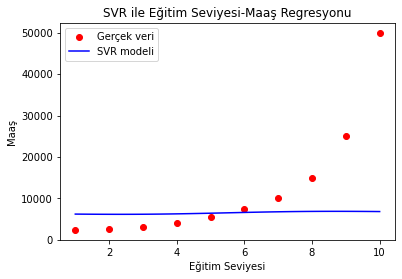

In [5]:

# SVR modelini oluşturma ve eğitme
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_svr, Y_svr)

# SVR modeli için tahminler
X_svr_plot = np.linspace(min(X_svr), max(X_svr), 100).reshape(-1, 1)
Y_svr_pred = svr_model.predict(X_svr_plot)

# Gerçek veri noktaları ve SVR regresyon çizgisini çizdirme
plt.scatter(X_svr, Y_svr, color='red', label='Gerçek veri')
plt.plot(X_svr_plot, Y_svr_pred, color='blue', label='SVR modeli')
plt.title('SVR ile Eğitim Seviyesi-Maaş Regresyonu')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Maaş')
plt.legend()
plt.show()


In [6]:
# bu yerinde bir analiz olmadı 
'''SVM modeliniz için en iyi C, gamma ve epsilon parametrelerini bulmak, modelin performansını optimize 
etmek ve verilerinize en iyi uyumu sağlamak için önemlidir. 
Bu tür parametre ayarlamaları için genellikle (grid search) ve çapraz doğrulama (cross-validation) teknikleri
kullanılır.'''

'SVM modeliniz için en iyi C, gamma ve epsilon parametrelerini bulmak, modelin performansını optimize \netmek ve verilerinize en iyi uyumu sağlamak için önemlidir. \nBu tür parametre ayarlamaları için genellikle (grid search) ve çapraz doğrulama (cross-validation) teknikleri\nkullanılır.'

In [7]:
from sklearn.model_selection import GridSearchCV

# Parametre ızgarasını tanımla
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'epsilon': [0.01, 0.1, 0.5, 1]
}

# GridSearchCV nesnesini oluştur
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')

# Izgara aramasını çalıştır
grid_search.fit(X_svr, Y_svr)

# En iyi parametreleri ve skoru göster
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END ....................C=0.1, epsilon=0.01, gamma=0.01; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.01, gamma=0.1; total time=   0.0s
[CV] END .......................C=0.1, epsilon=0.01, gamma=1; total time=   0.0s
[CV] END .......................C=0.1, epsilon=

[CV] END ......................C=1, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END ......................C=1, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END ......................C=1, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END ......................C=1, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .........................C=1, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ..........................C=1, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ...................

[CV] END ....................C=100, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END ....................C=100, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END ....................C=100, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END ....................C=100, epsilon=0.5, gamma=scale; total time=   0.0s
[CV] END .......................C=100, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .......................C=100, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .......................C=100, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .......................C=100, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END .......................C=100, epsilon=1, gamma=0.01; total time=   0.0s
[CV] END ........................C=100, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ........................C=100, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ........................C=100, epsilon=1, gamma=0.1; total time=   0.0s
[CV] END ...................

({'C': 100, 'epsilon': 0.01, 'gamma': 0.1}, -269045909.1489908)